In [65]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# Self is my enemy

class node():
    def __init__(self, node_name):
        self.node_name = node_name  # name type is string
        self.neigbors = []          # neighbors are nodes (not node names)
        
    def neighbor_names(self):
        return [node.node_name for node in self.neigbors]    
    
    
class graph():
    def __init__(self, elist):
        self.elist = elist

        sources = [s for s,t in elist]
        targets = [t for s,t in elist]

        self.node_names = list(set(sources + targets))
        self.nodes = {node_name:node(node_name) for node_name in self.node_names}
        
        self.create_graph()

    def add_edge(self, sname, tname):
        self.nodes[sname].neigbors.append(self.nodes[tname])
        self.nodes[tname].neigbors.append(self.nodes[sname])
        
    def create_graph(self):
        for s, t in self.elist:
            self.add_edge(s,t)
            
    def info(self):
        return {node_name: self.nodes[node_name].neighbor_names() for node_name in self.node_names}
    
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.Graph()
        G.add_edges_from(self.elist)
        plt.figure(figsize=(16,8))
        nx.draw(G, node_size=5000, node_color=color, with_labels=True)
       
        

In [73]:
elist = """
0 5
4 3
0 1
9 12
6 4
5 4
0 2
11 12
9 10
0 6
7 8
9 11
5 3
"""

elist = [tuple(line.split(' ')) for line in elist.split('\n') if line != '']

In [74]:
elist

[('0', '5'),
 ('4', '3'),
 ('0', '1'),
 ('9', '12'),
 ('6', '4'),
 ('5', '4'),
 ('0', '2'),
 ('11', '12'),
 ('9', '10'),
 ('0', '6'),
 ('7', '8'),
 ('9', '11'),
 ('5', '3')]

In [75]:
G = graph(elist)

In [76]:
G.node_names

['1', '0', '10', '6', '8', '2', '12', '5', '7', '3', '9', '11', '4']

In [77]:
G.nodes['9'].neighbor_names()

['12', '10', '11']

In [78]:
G.info()

{'1': ['0'],
 '0': ['5', '1', '2', '6'],
 '10': ['9'],
 '6': ['4', '0'],
 '8': ['7'],
 '2': ['0'],
 '12': ['9', '11'],
 '5': ['0', '4', '3'],
 '7': ['8'],
 '3': ['4', '5'],
 '9': ['12', '10', '11'],
 '11': ['12', '9'],
 '4': ['3', '6', '5']}

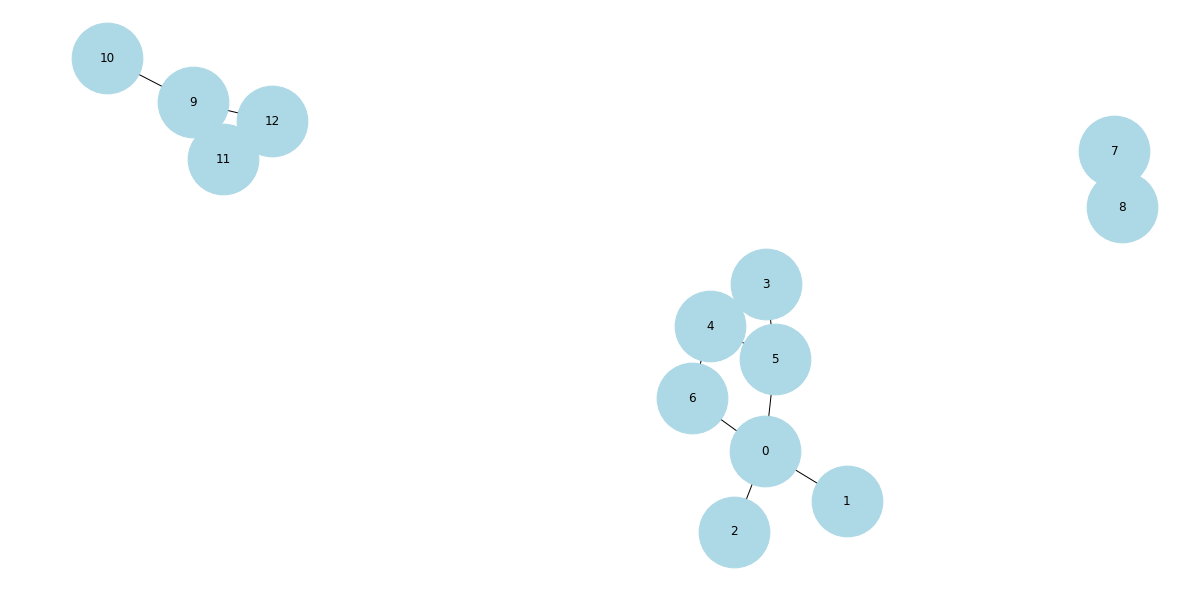

In [79]:
G.draw()

# Anouncement
 - Mudek `4 March at 15:30`
 - People from YOK wants to talk with our beloved students :)
 - Come and tell how we are `happy` with our program

In [83]:
class DFS():
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in G.node_names}
        self.traversal = []
        
    def dfs(self, sname):
        self.visited[sname] = True
        self.traversal.append(sname)
            
        for neighbor_name in self.G.nodes[sname].neighbor_names():
            if not self.visited[neighbor_name]:
                self.dfs(neighbor_name)

In [84]:
search = DFS(G)

In [85]:
search.dfs('0')

In [86]:
search.traversal

['0', '5', '4', '3', '6', '1', '2']

In [91]:
simple_elist = [('A', 'C'),('C', 'E'),('A', 'B')]
simple_graph = graph(simple_elist)
simple_search = DFS(simple_graph)
simple_search.dfs('A')
#simple_search.traversal

In [92]:
simple_graph.info()

{'C': ['A', 'E'], 'A': ['C', 'B'], 'B': ['A'], 'E': ['C']}

In [93]:
simple_search.traversal

['A', 'C', 'E', 'B']

# Connected Component

In [106]:
class ConnectedComponent():
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in G.node_names}
        self.id = {}
        
        self.count = 0
        
        for node_name in self.G.node_names:
            if not self.visited[node_name]:
                self.dfs(node_name)
                self.count += 1
                
    def dfs(self, sname):
        self.visited[sname] = True
        self.id[sname] = self.count
        
        for neighbor_name in self.G.nodes[sname].neighbor_names():
            if not self.visited[neighbor_name]:
                self.dfs(neighbor_name)
    
    def path_exist(self, s,t):
        """Returns true if they are in the same component"""
        return  self.id[s] ==  self.id[t]
                

In [107]:
G.info()

{'1': ['0'],
 '0': ['5', '1', '2', '6'],
 '10': ['9'],
 '6': ['4', '0'],
 '8': ['7'],
 '2': ['0'],
 '12': ['9', '11'],
 '5': ['0', '4', '3'],
 '7': ['8'],
 '3': ['4', '5'],
 '9': ['12', '10', '11'],
 '11': ['12', '9'],
 '4': ['3', '6', '5']}

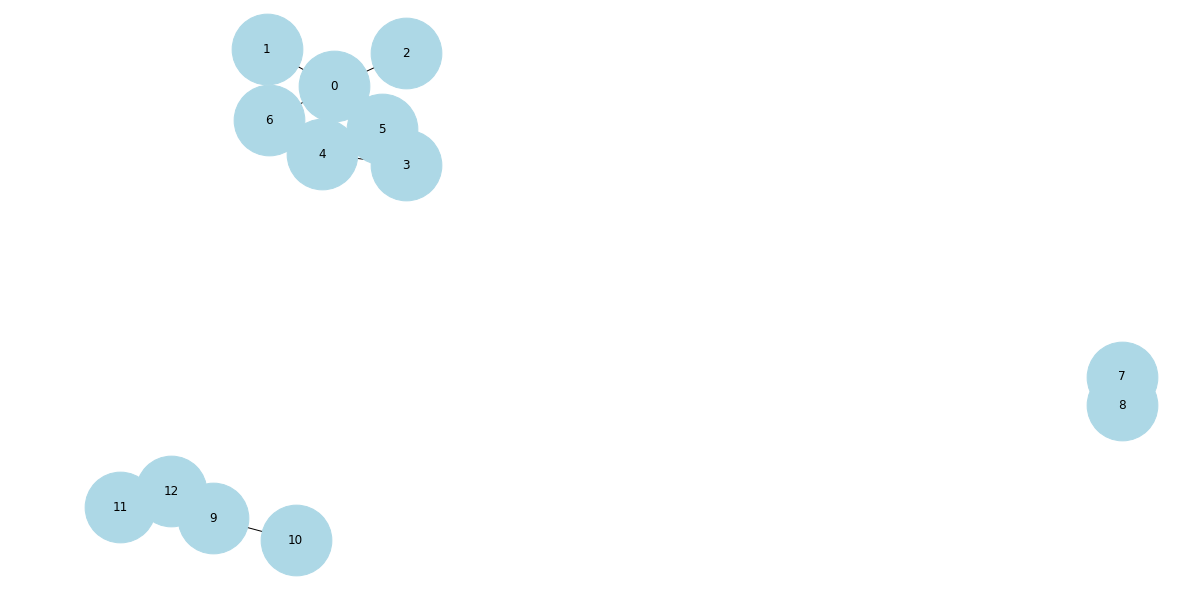

In [108]:
G.draw()

In [109]:
CC = ConnectedComponent(G)

In [110]:
CC.id

{'1': 0,
 '0': 0,
 '5': 0,
 '4': 0,
 '3': 0,
 '6': 0,
 '2': 0,
 '10': 1,
 '9': 1,
 '12': 1,
 '11': 1,
 '8': 2,
 '7': 2}

# Questions
Write the python code for
 - Find the number of components?
 - Is there a path from s to t?

In [111]:
CC.count # First Question

3

In [113]:
CC.path_exist(s = '7', t = '0') # Second Question

False